In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd


def match_values(dicts,val):
    for i in list(dicts.keys()):
        if dicts[i] == val:
            return i

def cross_validated(data,fold,degree):
    rms = []
    n = len(data)//fold
    temp_data = list(data)
    for _ in range(fold):
        test = random.sample(temp_data,n)
        train = list(data)
        for i in test:
            train.remove(i)
            temp_data.remove(i)
        rms.append(rmse_calculator(train,test,degree))
    return sum(rms)/len(rms)


def nested_cross_validated(data,fold):
    rms = []
    n = len(data)//fold
    temp_data = list(data)
    for _ in range(fold):
        test = random.sample(temp_data,n)
        train_val = list(data)
        for i in test:
            train_val.remove(i)
            temp_data.remove(i)


        temp_train_val = list(train_val)
        n_nested = len(train_val)//fold
        deg = {}
        deg_avg = {}
        deg_sd = {}
        for i in range(1,11):
            deg[i] = []
            deg_avg[i] = []
            deg_sd[i] = []
        for _ in range(fold):
            val = random.sample(temp_train_val,n_nested)
            train = list(train_val)
            for i in val:
                train.remove(i)
                temp_train_val.remove(i)
            for degree in range(1,11):
                rmtemp = rmse_calculator(train,val,degree)
                deg[degree].append(rmtemp)

        for i in range(1,11):
            values = deg[i]
            avg = sum(values)/len(values)
            sd = (sum([(x-avg)**2 for x in values])/(len(values)-1))**(1/2)
            deg_avg[i].append(round(avg,4))
            deg_sd[i].append(round(sd,4)) 
        
        best_sd = min(deg_sd.values())
        best_avg = min(deg_avg.values())

        best_degree = match_values(deg_sd,best_sd)
        # best_degree = match_values(deg_avg,best_avg)
        # print(best_degree)
        rmstemp = rmse_calculator(train_val,test,best_degree)
        rms.append(rmstemp)
    return sum(rms)/len(rms)

            

def table(sizelist,maxseed,degree,noise):
    tb = {'Sample Size':sizelist,'Training':[],'CV':[]} 
    for i in sizelist:
        train_list = []
        cv_list = []
        print(i)
        for seed in range(maxseed):
            data = generate_custom_sine_wave(i,seed,noise)
            train_rmse = rmse_calculator(data,data,degree)
            cv_rmse = cross_validated(data,5,degree)
            train_list.append(train_rmse)
            cv_list.append(cv_rmse)
        tb['Training'].append(sum(train_list)/len(train_list))
        tb['CV'].append(sum(cv_list)/len(cv_list))
    csv = pd.DataFrame(tb)
    return csv
    
        

def generate_custom_sine_wave(num_points,seed,noise=0):
    random.seed(seed)
    x = [random.uniform(-1,1) for _ in range(num_points)]
    # y = [np.sin(np.pi * i) for i in x]
    
    y = [np.sin(np.pi * i)+np.random.normal(0,noise,1)[0] for i in x]
    xy = [[x[i],y[i]] for i in range(num_points)]
    return xy

def rmse(coef,xy):
    data = []
    for i in xy:
        y_hat = 0
        for j in range(len(coef)):
            y_hat += coef.item(j)*i[0]**(j)
        rse = (y_hat-i[1])**2
        data.append(rse)
    return (sum(data)/(len(data)))**(1/2)

def normal_eq(xy,degree):
    xn = [i[0] for i in xy]
    yn = [i[1] for i in xy]
    x_mat = []  
    for i in range(degree+1):
        x_mat.append([x**i for x in xn])
    cmx = np.matrix(x_mat).transpose()
    my = np.matrix(yn).transpose()
    xT = cmx.transpose()
    coef = ((xT*cmx)**-1)*(xT*my)
    return coef

def rmse_calculator(train,test,degree):
    coef = normal_eq(train,degree)
    result = rmse(coef,test)
    return result



In [ ]:
# xy = generate_custom_sine_wave(200,19,0)
# round(nested_cross_validated(xy,5))
for i in range(20,501,10):
    xy = generate_custom_sine_wave(i,2,0)
    print(i,round(cross_validated(xy,5,5),4),round(nested_cross_validated(xy,5),4))

RMSE CV = 0.2022
RMSE TRAIN = 0.1586


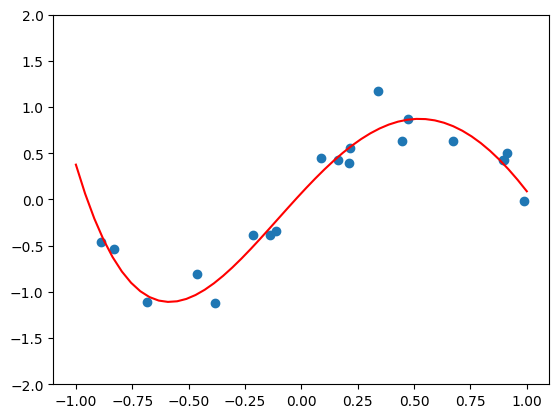

In [106]:
xy = generate_custom_sine_wave(20,2,0.2)
x_arr = [i[0] for i in xy]
y_arr = [i[1] for i in xy]
plt.scatter(x_arr,y_arr)
degree = 4
coef = normal_eq(xy,degree)

def yl(x,coef):
    yl = []
    for i in x:
        y = 0
        for j in range(len(coef)):
            y += coef.item(j)*i**(j)
        yl.append(y)
    return yl
print('RMSE CV =','%.4f'%cross_validated(xy,5,degree))
print('RMSE TRAIN =','%.4f'%rmse_calculator(xy,xy,degree))
# print(cross_validated(xy,,1))
# y = 0
# x = sym.symbols('x')
# for i in range(len(coef)):
#     y += coef.item(i)*x**(i)
# print(sym.simplify(y))
lix = list(np.linspace(-1,1))
# liy = [y.subs([(x,i)]) for i in lix]
liy = yl(lix,coef)
plt.ylim([-2,2])
plt.plot(lix,liy,color ='red')
plt.show()


In [ ]:




xy = [[-0.731, -0.748], [-0.49, -1.0], [-0.101, -0.312], [0.303, 0.815], [-0.943, -0.178]]
x=[i[0] for i in xy]
y = [i[1] for i in xy]
print(np.polyfit(x,y,9))
print(normal_eq(xy,9))

In [ ]:
a = {1:2,2:1,3:10,4:0.5}

print(max(a.values()))
def match_values(dicts,val):
    for i in list(dicts.keys()):
        if dicts[i] == val:
            return i
match_values(a,10)

In [33]:
cv = []
train = []
x = []
for i in range(10,201,10):
    xy = generate_custom_sine_wave(i,15)
    # print('%.4f'%cross_validated(xy,5,7))
    print('%.4f'%nested_cross_validated(xy,5))
    # cv.append(cross_validated(xy,5,1))
    # train.append(rmse_calculator(xy,xy,1))
    # x.append(i)

# plt.plot(x,cv,color = 'red')
# plt.plot(x,train,color='blue')
# plt.show()




LinAlgError: Singular matrix